In [3]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, LeakyReLU

from keras.preprocessing.image import img_to_array, load_img

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
allData = pd.read_csv('./data.csv')
fields = ['filename', 'human']
data = allData[fields]

In [3]:
basePath = './rawData'

channels = 3
nb_classes = 1
image_height=720
image_width=1280

In [20]:
img = load_img(basePath + '/' + data.filename[1])
img.size

(1280, 720)

In [4]:
dataset = np.ndarray(shape=(len(data), image_height, image_width, channels),dtype=np.float32)

In [5]:
y_dataset = []

i=0

# Set of markers so I can create an lst
files = []

for index, row in data.iterrows():
    y_dataset.append(row.human)
    img = load_img(basePath + '/' + row.filename)
    files.append('rawdata/' + row.filename)
    x = img_to_array(img)
    x = x / 255.0
    dataset[i] = x
    i += 1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(dataset, y_dataset, test_size=0.2)

In [7]:
x_lst_train, x_lst_test, y_lst_train, y_lst_test = train_test_split(files, y_dataset, test_size=0.2)

with open('./train_lst', 'w') as f:
    i = 0
    for filename in x_lst_train:
        f.write('{}\t{}\t{}\n'.format(i,y_lst_train[i], filename))
        i += 1

with open('./validation_lst', 'w') as f:
    i = 0
    for filename in x_lst_test:
        f.write('{}\t{}\t{}\n'.format(i,y_lst_test[i], filename))
        i += 1


In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train[1,:].shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 718, 1278, 32)     896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 359, 639, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 357, 637, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 178, 318, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 176, 316, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 88, 158, 128)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 86, 156, 128)      147584    
__________

In [332]:
batch_size=16
epochs=4

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
model.save('current_full.h5')

Train on 441 samples, validate on 111 samples
Epoch 1/4
441/441 [==============================] - 293s 665ms/step - loss: 3.9147 - acc: 0.5193 - val_loss: 0.6601 - val_acc: 0.7117
Epoch 2/4
441/441 [==============================] - 278s 632ms/step - loss: 0.7668 - acc: 0.6236 - val_loss: 0.5396 - val_acc: 0.7207
Epoch 3/4
441/441 [==============================] - 940s 2s/step - loss: 0.9125 - acc: 0.7415 - val_loss: 0.7701 - val_acc: 0.6396
Epoch 4/4
441/441 [==============================] - 297s 673ms/step - loss: 0.5432 - acc: 0.7982 - val_loss: 0.4425 - val_acc: 0.8378


In [333]:
score = model.evaluate(x_test, y_test, verbose=1)

111/111 [==============================] - 24s 214ms/step


In [394]:
i = 0
for metric in model.metrics_names:
    print(metric + ": " + str(score[i]))
    i += 1

loss: 0.44247102468937366
acc: 0.837837839985753


Predicted Chance of human: 0.7033617
Jeff's personalized prediction: 0


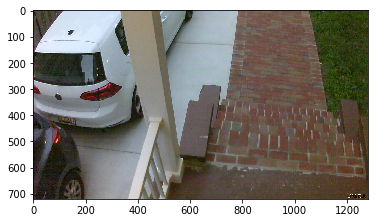

In [389]:
i = 7
results = model.predict(x_test[i:i+1])

print("Predicted Chance of human: " + str(results[0,0]))
print("Jeff's personalized prediction: " + str(y_test[i]))

plt.imshow(x_test[i])
